In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\velur\Downloads\archive (2)\Resume\Resume.csv")

In [5]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df.shape

(2484, 4)

In [7]:
df.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [8]:
df1=df.drop(columns=["ID","Resume_html"],axis=1)

In [9]:
df1

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [10]:
df1.shape

(2484, 2)

# EXPLORING CATEGORIES

In [11]:
df1["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

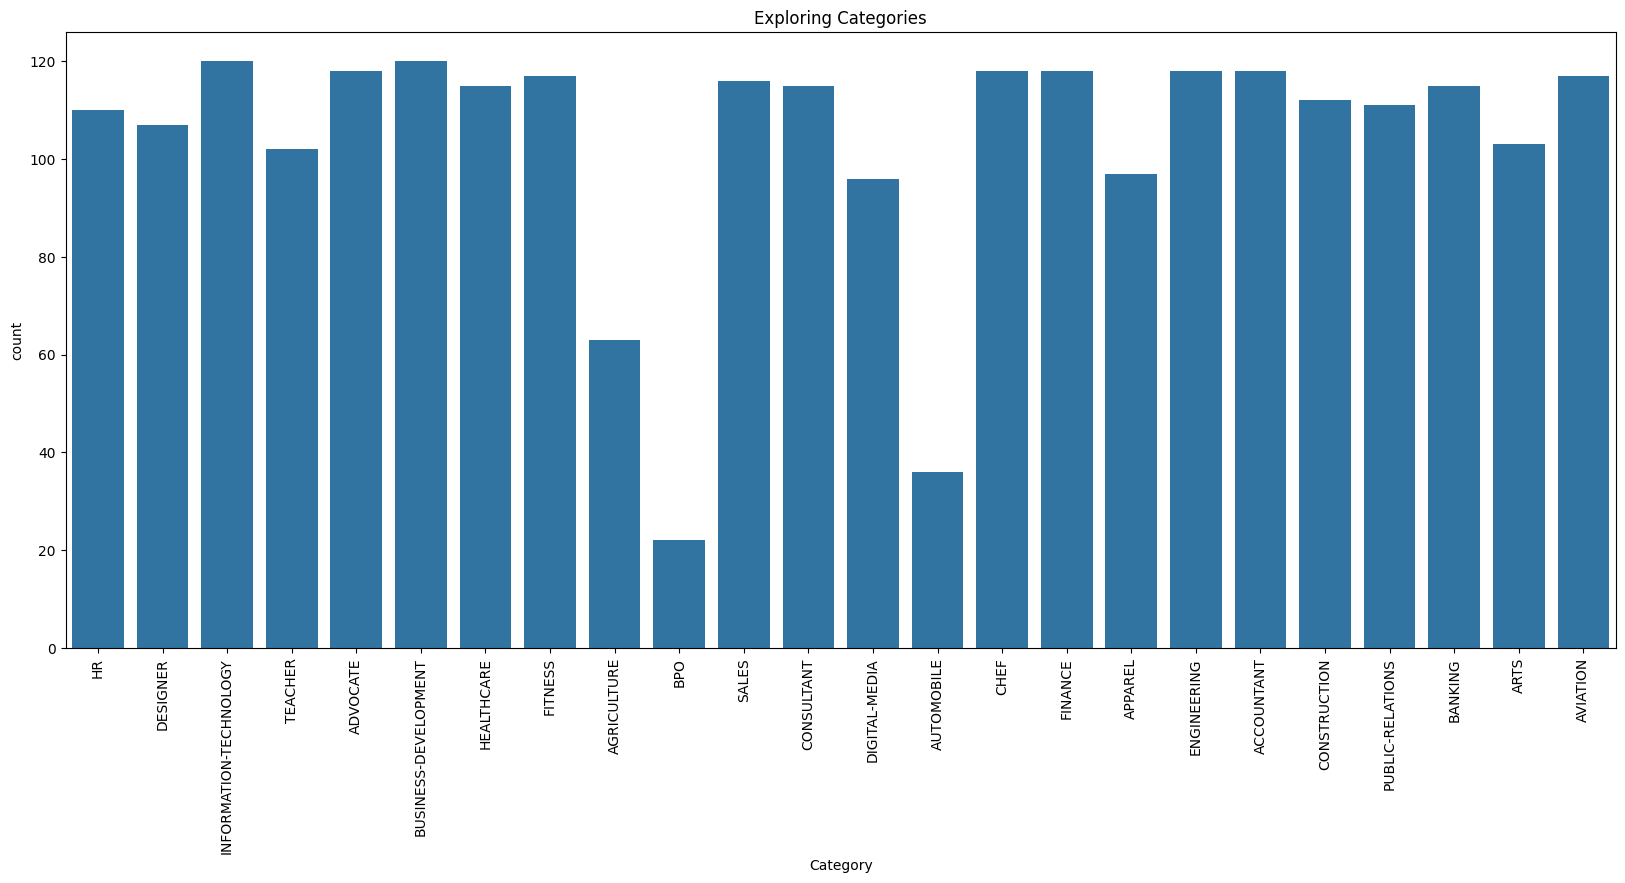

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x=df1["Category"])
plt.xlabel("Category")
plt.ylabel("count")
plt.title("Exploring Categories")
plt.xticks(rotation=90)
plt.show()

In [13]:
df1["Category"].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

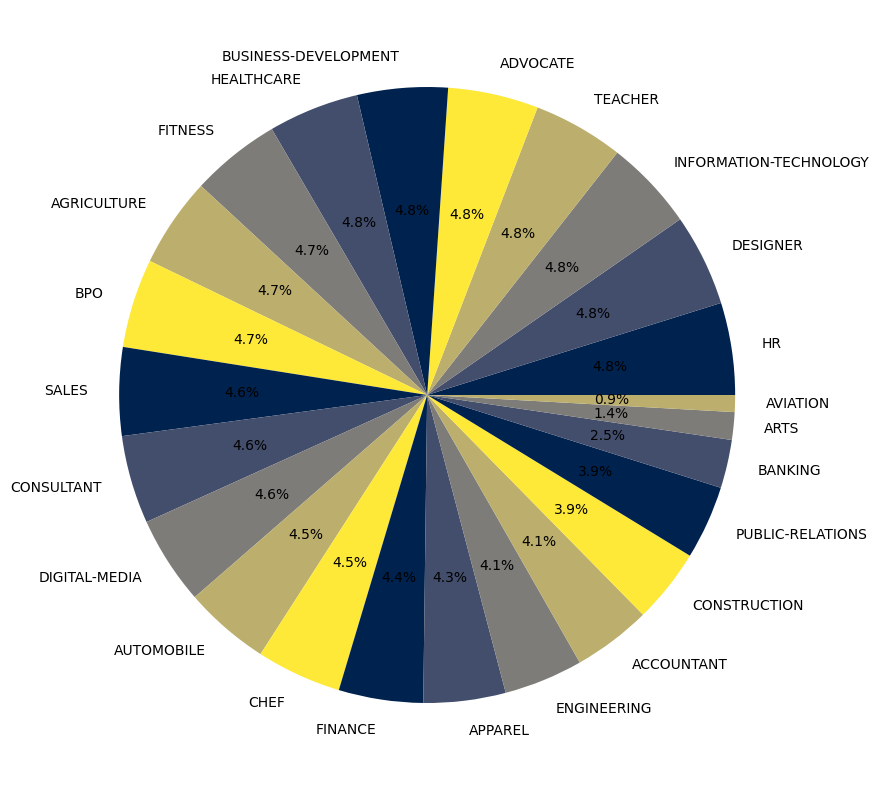

In [14]:
count= df1["Category"].value_counts()
Label=df1["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(count,labels=Label,autopct="%1.1f%%",colors=plt.cm.cividis(np.linspace(0,1,5)))
plt.show()

# Exploring Resume

In [15]:
df1["Category"][0]

'HR'

In [16]:
df1["Resume_str"][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

# Cleaning Data:
##### 1.URL
##### 2.hashtags
##### 3.Mentions
##### 4.Special Characters
##### 5.Punctuations

In [17]:
import re
def CleanResume(txt):
    Cleantxt = re.sub(r'http\S+',' ',txt)
    Cleantxt = re.sub(r'@\S+',' ',Cleantxt)
    Cleantxt = re.sub(r'#\S+',' ',Cleantxt)

    return Cleantxt

In [18]:
# To remove websites and mails.
CleanResume("My #Resume website is like http://helloworld and access it @gmail.com")

'My   website is like   and access it  '

In [19]:
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+', ' ', txt)  # Remove URLs
    cleanText = re.sub(r'\b(RT|cc)\b', ' ', cleanText)  # Remove Twitter terms
    cleanText = re.sub(r'@\w+|#\w+', ' ', cleanText)  # Remove mentions and hashtags
    cleanText = re.sub(r'[!"#$%&()*+,-./:;<=>?\[\]\\^_`{|}~]', ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7F]+', ' ', cleanText)  # Remove non-ASCII characters
    cleanText = re.sub(r'\d+', ' ', cleanText)  # Remove numbers (optional)
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()  # Remove extra spaces and strip
    return cleanText.lower() #change all characters into lower case

In [20]:
df1["Resume_str"]= df1["Resume_str"].apply(lambda x: cleanResume(x))

In [21]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\velur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df1['Resume_str'] = df1['Resume_str'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [23]:
df1["Resume_str"][0]

"hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state helps devel

# words into categorical values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df1["Category"]=le.fit_transform(df1["Category"])

In [26]:
df1.head()

,Resume_str,Category
0,hr administrator marketing associate hr admini...,19
1,hr specialist us hr operations summary versati...,19
2,hr director summary years experience recruitin...,19
3,hr specialist summary dedicated driven dynamic...,19
4,hr manager skill highlights hr skills hr depar...,19


In [27]:
df1["Category"].unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [28]:
# ['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
   #    'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
   #    'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
   #    'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
    #   'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']

# Balance Classes

In [29]:
# Check the original category distribution
print("Original Category Distribution:")
print(df1['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df1['Category'].value_counts().max()

# Perform oversampling
balanced_df = df1.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df1 = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df1['Category'].value_counts())

Original Category Distribution:
Category
20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
19    120
8     120
23    120
0     120
5     120
7     120
18    120
14    120
6     120
20    120
4     120
16    120
13    120
17    120
9     120
2     120
3     120
11    120
22    120
21    120
12    120
15    120
10    120
1     120
Name: count, dtype: int64


C:\Users\velur\AppData\Local\Temp\ipykernel_1368\1222719187.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df1.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [30]:
df1["Category"].value_counts()

Category
19    120
8     120
23    120
0     120
5     120
7     120
18    120
14    120
6     120
20    120
4     120
16    120
13    120
17    120
9     120
2     120
3     120
11    120
22    120
21    120
12    120
15    120
10    120
1     120
Name: count, dtype: int64

# Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
required_text=tfidf.fit_transform(df1["Resume_str"])

# Splitting

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(required_text, df1['Category'], test_size=0.2, random_state=42)

In [39]:
X_train.shape

(2304, 30261)

In [34]:
X_test.shape

(576, 30261)

# Now let’s train the model and print the classification report:


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [43]:
y_train

252      2
1808    20
1426    22
964     15
2602    17
        ..
1638    10
1095     0
1130    12
1294     6
860     22
Name: Category, Length: 2304, dtype: int32

In [44]:
# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.6146
Confusion Matrix:
[[24  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  6  0  0  1  3  0  0  2  0  0  0  0  0  1  0  0  0  5  0  0  0  0  0]
 [ 0  1  9  0  3  0  1  0  0  4  0  2  1  0  0  1  1  1  2  0  2  4  0  1]
 [ 0  1  0  7  0  2  0  0  0  0  0  3  1  0  1  0  3  0  1  0  0  0  4  1]
 [ 0  2  0  0  8  2  1  1  2  0  0  0  0  0  2  1  0  0  2  2  0  0  1  3]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  2  0  0  1  0  0  2  1  2  0  0  0]
 [ 0  0  0  0  0  1 16  0  1  0  0  1  0  0  0  0  0  0  0  0  2  0  2  0]
 [ 0  2  3  0  0  3  0 12  3  3  0  0  0  0  1  0  1  0  2  0  1  0  0  1]
 [ 0  0  0  0  0  1  0  0 20  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1 13  1  0  2  0  0  0  0  0  2  0  1  0  1  0]
 [ 0  0  0  0  0  1  1  0  0  0 19  0  0  0  0  0  0  0  1  1  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0

In [47]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.8854
Confusion Matrix:
[[24  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0  3  0  0  0  1  0]
 [ 0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  4  0  0]
 [ 0  0  0 18  1  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  2  0]
 [ 0  1  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  1  3  1  2  0  0  5]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  3  0  0  0  1  2  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  1  0 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 22  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  

In [46]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.8646
Confusion Matrix:
[[25  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  1  1]
 [ 0  0  0  0 11  0  0  0  0  0  0  1  1  0  0  2  0  3  2  1  1  0  0  5]
 [ 0  0  1  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  3  0  0  0  1  2  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 18  1  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  0 22  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 

In [49]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [50]:
GausianNB = GaussianNB()
GausianNB.fit(X_train, y_train)
Gausian_pred=GausianNB.predict(X_test)
print("\nGausianNB Results:")
print(f"Accuracy: {accuracy_score(y_test, Gausian_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, Gausian_pred)}")
print(f"Classification Report:\n{classification_report(y_test, Gausian_pred)}")


GausianNB Results:
Accuracy: 0.7517
Confusion Matrix:
[[14  0  1  0  0  0  0  4  0  0  0  1  4  0  0  0  2  0  0  1  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  1  0  0  0  2  0  0  0  0  4  0  0  0  1  0]
 [ 1  0 24  0  3  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  1  0 16  0  0  1  0  0  0  0  1  2  0  0  0  0  1  0  0  0  0  2  0]
 [ 0  1  0  0 13  0  1  0  0  0  0  2  1  0  0  1  0  3  1  1  0  0  0  3]
 [ 0  0  1  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 18  0  1  0  3  1  0  0  0  0  4  0  0  1  2  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 15  1  0  2  0  1  1  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0 21  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  

# Save Files


In [51]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [52]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [53]:
my_resume = """PURCHASER / PRODUCTION COORDINATOR
 Professional Profile
 Productive, quality oriented professional eager to contribute comprehensive skils toward actively supporting a progressive organization as a key
 team member. Featured Skils x Expedite / AOG / Logistics x Customer Service x Finance / Accounting x Sales x Purchasing x Inventory Control
 x Stores / Warehouse x Management x Shipping x Receiving x Bookkeeping Ability to act independently to determine methods and procedures on
 new assignments. * Ability to respond consistently with a high degree of initiative to resolve issues or complex problems that may arise. * Ability to
 maintain positive company image and brand. * Ability to perform work accurately and thoroughly. * Eficient organization and time-management
 skils. * Ability to prioritize tasks and meet deadlines. * A courteous and professional demeanor. * Strong negotiation skils * Ability to work wel
 under pressure * Intermediate to advanced computer skils. Proficient with MS O fice suite and other work-related software. Additional
 Comments I have been working in the Aviation industry for 12 years now and bring with me a total on 15 years of experience that makes me a
 wel-seasoned professional. I bring with me experience of working with commercial, military, charter, and prototype aircraft. I am experienced and
 knowledgeable with Boeing, Airbus, Bombardier, Dornier, and Lockheed and have proven myself to be both versatile when working with various
 aircraft makes & customers.
 Experience
 January 2011
 to
 Current
 Company Name City , State Purchaser / Production Coordinator
 My journey at Flightstar began with production coordinating, where I was responsible for interfacing with leads, project managers, and
 customer representatives regarding aircraft documentation, parts status, and any problems that may a fect the delivery schedule.
 In this position I was responsible for aircraft paperwork and work cards during the maintenance visits.
 I worked one on one with purchasing to ensure the proper communication of parts that could a fect aircraft delivery and help expedite these
 parts as necessary.
 When services were required either in house or items being sent out for any kind of testing or repair, I would provide complete and accurate
 paperwork to purchasing.
 Daily reporting of parts statuses, man hours, and aircraft schedule was a daily task.
 Being a coordinator first and already having experience in purchasing made my transition to a buyer smooth since I could now work more
 closely with the coordinators with each of us able to support one another be ter with part status updates and any paperwork issues.
 Like coordinators I have to interface with leads, project managers, and customer representatives.
 In addition I have to communicate between various departments at FAS such accounting to make sure that material is paid and biled
 accurately as wel as quality to make sure that the parts purchase are up to standard and come from an approved source.
 Being on both sides of the fence I know see that coordinators spend more time corresponding between the diferent areas of the job where
 buyers spend more time on parts themselves.
 Purchasers are responsible for every part purchased or requested and Have the sole responsibility of resolving any materials needed.
 I have to not only purchase the parts but also validate the paperwork or trace is acceptable and legal.
 If it isn't, resolve any rejected parts by means of returns and credits.
 Buyers are responsible for expediting al orders and making sure that they are received as needed.
 We then report this information to the coordinators and project managers as necessary.
 Outside vendor interaction is a big part of purchasing and we have to form business relationships to e fectively perform or duties.
 In addition I am responsible for meeting standards and performance metrics within the company to make that we are functioning at an
 industry standard to rise above the competition.
 Purchasing is also responsible for cost savings such engaging in supplier contracts and rebate programs.
 These savings of course benefits everyone on the company.
 Purchasers are a point of contact between FAS, suppliers, and customers regarding materials so e fective communication and reporting is
 key in this position.
 February 2009
 to
 December 2010
 Company Name City , State Purchasing Clerk / Material Specialist
 Working with Vision Airlines included a lot of diferent responsibilities.
 Not only was I responsible for quoting and purchasing materials for both Aircraft and Stock, but also included Stores / Warehouse,
 Shipping, and Receiving responsibilities.
 Being a smaler Airline I work closely with the Executive sta f as wel as the owners of the company themselves.
 After receiving a Material Order Request, I would acquire the necessary quotes to find the best price and lead time available.
 If needed, get approval to proceed with the order.
 Coordinate and expedite the shipping and payment process to get the material where it needs to be in a timely manner.
 I would match invoice with purchase orders and track shipments to assure their arrival.
 Upon receipt of material, I then would verify proper certification of the material, receive into the system, and label as required.
 Once material is ready to be used, issue from the system to assure al records was correct.
 Al of this required constant tracking using Excel, Word, and Adobe.
 I kept records of al transactions whether it was materials needing to be ordered, Purchase Orders themselves, Invoices needing to be paid,
 or items that that have already been received.
 As wel as certifications and any other information requested from maintenance.
If an item needed to be shipped I was responsible for the proper packaging, handling, and traceability to be done in a professional manner.
 As part of the AOG team I would be caled on at any time to locate and facilitate the material where the urgent requirement may be.
 This involved having key information to acquire the material and coordinate with the proper logistics necessary.
 Also as a valued member of the material group I have represented the Airline at maintenance facilities to properly manage the material being
 ordered and used for an Aircraft.
 February 2005
 to
 January 2009
 Company Name City , State Purchasing Agent / Material Expeditor
 I started working as a Material Expeditor which required me to work closely with Purchasing, Maintenance, and the Airline.
 Being an Expeditor had responsibilities that could change day by day depending on what was required of me.
 I provided daily reports and expedited any material needed to keep the production process flowing e ficiently.
 This meant coordinating the order and shipment process, as wel as the actual delivery of the material.
 My responsibility as a Purchasing Agent is to find price and availability on material needed and then order and track for prompt shipment.
 This requires me to deal directly with the vendors and develop relationships for future business.
 I also retrieve any and al paperwork required, retrieving certification, submit any and al signatures necessary, and expedite the material in a
 timely fashion.
 Once I have received the material I then facilitate and expedite the flow of materials to and from various departments.
 I have worked with many diferent Airline companies as wel as Military, which al have high and demanding standards to meet.
 With this job no two days are the same, it is a constant change with chalenging obstacles.
 In addition to being a Buyer and Expeditor, I was responsible for doing spare Sales to sister and contract companies.
 This required the technique of verifying stock, quoting material, ensuring proper certification, and shipping.
 Between the three job functions I was constantly providing and coordinating AOG orders support.
 Clientlogic (DELL).
 Education
 1/2010
 Transportation Dangerous Goods Development Group Training Certificate
 8/2009
 Vision Airlines Maintenance Indoctrination Course Training Certificate
 8/2009
 Vision Airlines Reduced Vertical Separation Minimum Training Certificate (RVSM)
 8/2008
 Lake City Test of Basic Education (TABE) Community Colege Form 9, Level A, Score 12.9
 12/2005
 Federal Aviation Certificate of Training "Gold Award" Administration Maintenance Technicians Awards Program
 5/2001
 State of Florida High School Diploma Department of Education
 Skils
 accounting, Adobe, Basic, benefits, contracts, delivery, DELL, documentation, fashion, legal, logistics, materials, Excel, Word, packaging,
 Purchasing, quality, Receiving, reporting, requirement, Sales, Shipping, Transportation, Vision
 Additional Information
 Business reference known for 9 years.
 Linkedin Profile
 www.linkedin.com/in/johnchriske"""
pred(my_resume)

'AVIATION'

In [54]:
my_resume= """John Doe
📍 123 Greenfield Lane, Springfield, IL | 📞 (123) 456-7890 | ✉️ johndoe@email.com
🔗 LinkedIn Profile | 🌱 Personal Portfolio

🌾 Professional Summary
Dedicated Agricultural Specialist with 5+ years of experience in crop management, soil analysis, and sustainable farming practices. Skilled in precision agriculture, pest control, and farm equipment operation. Passionate about implementing modern agricultural techniques to increase yield and efficiency while ensuring environmental sustainability.

🌱 Skills & Expertise
✅ Crop Management & Soil Analysis
✅ Precision Agriculture & Smart Farming
✅ Livestock Care & Veterinary Assistance
✅ Irrigation Systems & Water Conservation
✅ Pest & Disease Control
✅ Farm Machinery & Equipment Operation
✅ Supply Chain & Agricultural Marketing
✅ Data Analysis & Record Keeping

🌾 Work Experience
Farm Manager | GreenHarvest Farms, Illinois (2020 – Present)
Managed 200-acre farmland, optimizing crop rotation and soil fertility.
Increased yield by 15% using precision agriculture techniques.
Implemented sustainable pest control methods, reducing chemical use by 30%.
Supervised a team of 10 farm workers, ensuring daily operations ran smoothly.
Agricultural Technician | FreshField AgriTech, Iowa (2017 – 2020)
Conducted soil and water testing to improve crop productivity.
Assisted in livestock health management and breeding programs.
Developed organic composting strategies, reducing farm waste by 25%.
📚 Education
🎓 Bachelor of Science in Agriculture – University of Illinois (2017)

Certifications
Certified Crop Advisor (CCA)
Sustainable Agriculture Certification
Farm Equipment Operation License
🌾 Projects & Research
📌 Smart Irrigation System Implementation – Designed an automated irrigation system that improved water efficiency by 40%.
📌 Organic Farming Experiment – Led a project testing organic vs. chemical fertilizers, resulting in a 20% yield increase with organic methods.

🌱 References
Available upon request.

Would you like a customized resume with a specific focus (e.g., agribusiness, livestock farming, research)? 😊"""
pred(my_resume)

'AGRICULTURE'